In [4]:
%reload_ext autoreload
%autoreload 1
import torch 
import sys
sys.path.append('..')
from torch import nn 
from torch.nn import functional as F
from torch import optim
from utils.loader import load,PairSetMNIST,Training_set,Test_set, Training_set_split,Validation_set
from torch.utils.data import Dataset, DataLoader
from models.Le_Net import LeNet_sharing_aux, train_Le_Net_Aux
from models.Inception_Net import Inception_block, conv_block, Google_Net, Auxiliary_loss, train_inception
from utils.evaluate_aux import compute_metrics, validate_model, evaluate_model, grid_search
import torch.cuda as cuda 

### 1 - Grid search to find hyperparameters

In [3]:
grid_search(LeNet_sharing_aux,train_Le_Net_Aux, mini_batch_size=100, optimizer = optim.SGD,
               criterion = nn.CrossEntropyLoss(), n_epochs=40, eta=1e-1,                                                                                      lambda_l2 = 0, alpha=0.5, beta=0.5,rotate = True,translate=True,swap_channel = True, GPU=True)

Train Epoch: 0  | Loss 153.042191


KeyboardInterrupt: 

### 2 - Fix hyperparameters and evaluate model

Train Epoch: 0  | Loss 32.282818
Train Epoch: 1  | Loss 14.796606
Train Epoch: 2  | Loss 7.785061
Train Epoch: 3  | Loss 5.461020
Train Epoch: 4  | Loss 4.066485
Train Epoch: 5  | Loss 3.196418
Train Epoch: 6  | Loss 2.605606
Train Epoch: 7  | Loss 2.280055
Train Epoch: 8  | Loss 1.782696
Train Epoch: 9  | Loss 1.628665
Train Epoch: 10  | Loss 1.315498
Train Epoch: 11  | Loss 1.130435
Train Epoch: 12  | Loss 0.970566
Train Epoch: 13  | Loss 0.829863
Train Epoch: 14  | Loss 0.826566
Train Epoch: 15  | Loss 0.734280
Train Epoch: 16  | Loss 0.651652
Train Epoch: 17  | Loss 0.584470
Train Epoch: 18  | Loss 0.593157
Train Epoch: 19  | Loss 0.458553
Train Epoch: 20  | Loss 0.489625
Train Epoch: 21  | Loss 0.477830
Train Epoch: 22  | Loss 0.459478
Train Epoch: 23  | Loss 0.387751
Train Epoch: 24  | Loss 0.333861
Train Epoch: 25  | Loss 0.325189
Train Epoch: 26  | Loss 0.339414
Train Epoch: 27  | Loss 0.306225
Train Epoch: 28  | Loss 0.231462
Train Epoch: 29  | Loss 0.236539
Train Epoch: 30  |

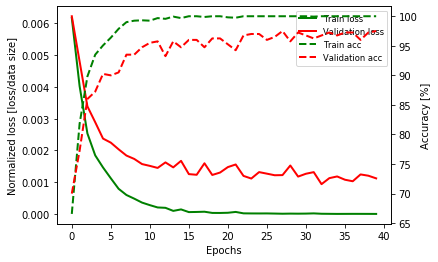


Test Set | Loss: 0.0018 | Accuracy: 95.20%



In [5]:

validate_model(LeNet_sharing_aux,train_Le_Net, mini_batch_size=100, optimizer = optim.Adam,
                 criterion = nn.CrossEntropyLoss(), n_epochs=40, eta=1e-3, 
                 lambda_l2 = 0, alpha=0.5, beta=0.5, plot=True,rotate = False,translate=False,swap_channel = True, GPU=True)
